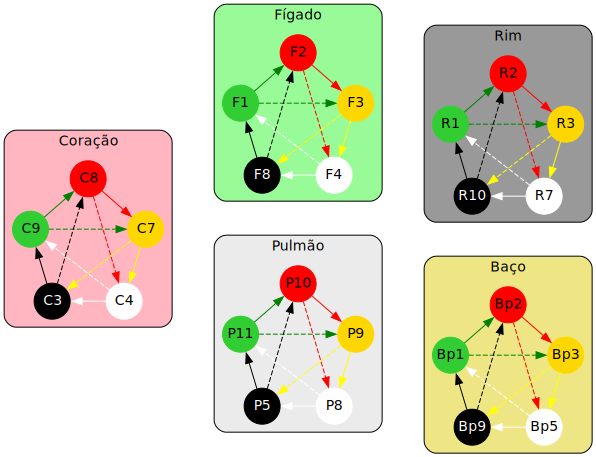

In [2]:
# -*- coding: utf-8 -*-
from graphviz import Digraph
from IPython import display

g = Digraph('ShuYin', engine="fdp")

# NOTE: the subgraph name needs to begin with 'cluster' (ALL LOWERCASE)
#       so that Graphviz recognizes it as a special cluster subgraph
def criar_wushu_card(zangfu,pontos, cor_fundo):
    with g.subgraph(name='cluster-'+zangfu) as r:
        r.attr(style='rounded', bgcolor=cor_fundo, fontname="verdana")
        r.node_attr.update(shape='circle', style = "filled", fontname="verdana", fixedsize="True")
        nomes = ['madeira-'+zangfu,'fogo-'+zangfu,'terra-'+zangfu,'metal-'+zangfu,'água-'+zangfu]
        labels = pontos
        cores = ['limegreen','red','gold','white','black']
        posicoes = ["0.2,0!","1,0.7!","1.8,0!","1.5,-1!","0.5,-1!"]

        for nome, label, cor, pos in zip(nomes,labels,cores,posicoes):
            if(nome.startswith("água")):
                cor_fonte = "white"
            else:
                cor_fonte = "black"
            r.node(nome, label, color=cor, pos=pos, fontcolor=cor_fonte)
        r.attr(label=zangfu)
        #Ciclo de geração
        r.edge('madeira-'+zangfu,'fogo-'+zangfu, color="green")
        r.edge('fogo-'+zangfu,'terra-'+zangfu, color="red")
        r.edge('terra-'+zangfu,'metal-'+zangfu,color="yellow")
        r.edge('metal-'+zangfu,'água-'+zangfu, color="white")
        r.edge('água-'+zangfu,'madeira-'+zangfu, color="black")
        #Ciclo de controle
        r.edge('madeira-'+zangfu,'terra-'+zangfu, color="green", style="dashed")
        r.edge('fogo-'+zangfu,'metal-'+zangfu, color="red", style="dashed")
        r.edge('terra-'+zangfu,'água-'+zangfu,color="yellow", style="dashed")
        r.edge('metal-'+zangfu,'madeira-'+zangfu, color="white", style="dashed")
        r.edge('água-'+zangfu,'fogo-'+zangfu, color="black", style="dashed")

criar_wushu_card("Rim",['R1','R2','R3','R7','R10'],"grey60")
criar_wushu_card("Pulmão",['P11','P10','P9','P8','P5'],"grey92")
criar_wushu_card("Baço",['Bp1','Bp2','Bp3','Bp5','Bp9'],"khaki2")
criar_wushu_card("Coração",['C9','C8','C7','C4','C3'],"lightpink")
criar_wushu_card("Fígado",['F1','F2','F3','F4','F8'],"palegreen")

display.display(g)